{'101': 81, '010': 3, '001': 4, '111': 1, '110': 4, '100': 3, '011': 3, '000': 1}


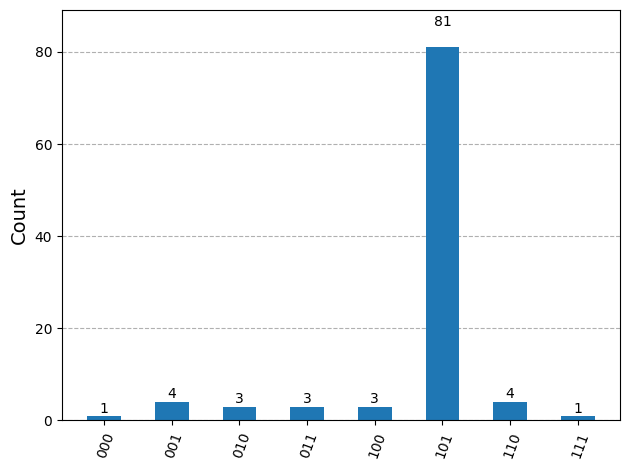

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt
%matplotlib inline


#for 101
# oracle=QuantumCircuit(3,name="oracle")
# oracle.x(1)
# oracle.ccz(0,1,2)
# oracle.x(1)

# oracle.to_gate()
# # oracle.draw()

def ccz_oracle(treasure:str):
    qc = QuantumCircuit(3, name="Oracle")
    
    for i, bit in enumerate(reversed(treasure)):
        if bit == '0':
            qc.x(i)
    
    qc.ccz(0, 1, 2)
    
    for i, bit in enumerate(reversed(treasure)):
        if bit == '0':
            qc.x(i)
    return qc.to_gate(label="oracle")

def grover_diffusion():
    qc=QuantumCircuit(3,name="diffusion")
    qc.h([0,1,2])
    qc.x([0,1,2])
    qc.ccz(0,1,2)
    qc.x([0,1,2])
    qc.h([0,1,2])
    return qc.to_gate(label="diffusion")

treasure="101"
oracle=ccz_oracle(treasure)
diffusion=grover_diffusion()


grover_circuit=QuantumCircuit(3,3)
grover_circuit.h([0,1,2])
grover_circuit.append(oracle,[0,1,2])
grover_circuit.append(diffusion,[0,1,2])
grover_circuit.measure([0,1,2],[0,1,2])

backend=Aer.get_backend("qasm_simulator")
transpiled_circuit=transpile(grover_circuit,backend)
job=backend.run(transpiled_circuit,shots=100)

count=job.result().get_counts()
print(count)
plot_histogram(count)
plt.show()
